# ABU 量化系统  简介 （版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'
* ####  __weixin__ = 'aaaabbbuu'

## 第一部分 数据获取

In [1]:
import ZEnv
import ZLog
import ZCommonUtil
%matplotlib inline

In [2]:
import SymbolPd

makedirs data/DayKLine/2016-09-19


In [3]:
kl_pd = SymbolPd.make_kfold_pd('usNOAH')

In [4]:
ZLog.info(kl_pd.shape)
ZLog.info(kl_pd.info())
ZLog.info(kl_pd.describe())
kl_pd.head()

(504, 12)
None
            atr14       atr21       close          date   date_week  \
count  504.000000  504.000000  504.000000  5.040000e+02  504.000000   
mean     1.459066    1.458645   24.391329  2.015252e+07    2.017857   
std      0.468504    0.433271    5.141005  6.667360e+03    1.396416   
min      0.622084    0.665682   12.950000  2.014091e+07    0.000000   
25%      1.138517    1.167521   21.402500  2.015031e+07    1.000000   
50%      1.505344    1.518778   24.380000  2.015091e+07    2.000000   
75%      1.760947    1.740111   26.955000  2.016031e+07    3.000000   
max      3.044239    2.715260   37.320000  2.016091e+07    4.000000   

             high         key         low  netChangeRatio        open  \
count  504.000000  504.000000  504.000000      504.000000  504.000000   
mean    24.936770  251.500000   23.820790        0.163690   24.376387   
std      5.265632  145.636534    5.024205        3.598193    5.140118   
min     13.420000    0.000000   12.890000      -10.86

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2014-09-09 to 2016-09-09
Data columns (total 12 columns):
atr14             504 non-null float64
atr21             504 non-null float64
close             504 non-null float64
date              504 non-null int64
date_week         504 non-null int64
high              504 non-null float64
key               504 non-null int64
low               504 non-null float64
netChangeRatio    504 non-null float64
open              504 non-null float64
preClose          504 non-null float64
volume            504 non-null int64
dtypes: float64(8), int64(4)
memory usage: 51.2 KB


,atr14,atr21,close,date,date_week,high,key,low,netChangeRatio,open,preClose,volume
2014-09-09,0.883184,0.890822,15.11,20140909,1,15.645,0,15.07,-2.89,15.51,15.56,145848
2014-09-10,0.874386,0.884592,15.16,20140910,2,15.180,1,14.80,0.33,15.15,15.11,240016
2014-09-11,0.845501,0.864850,15.26,20140911,3,15.370,2,14.90,0.66,15.13,15.16,234947
2014-09-12,0.823679,0.849381,14.89,20140912,4,15.250,3,14.71,-2.42,15.25,15.26,439425
2014-09-15,0.825559,0.849410,14.63,20140915,0,14.870,4,14.41,-1.75,14.87,14.89,288421


**默认获取最近两年数据，与大盘ixic做数据对齐操作， 多年数据修改参数，n_folds**

In [9]:
klpd_5y = SymbolPd.make_kfold_pd('usNOAH', n_folds=5)
klpd_5y.shape

(1260, 12)

**多个股票**

In [10]:
p_data = SymbolPd.make_kfold_mulpd(['usNOAH', 'usSFUN'])

**得到三维面板数据，可灵活使用**

In [21]:
ZLog.info(p_data)
p_data_it = p_data.swapaxes('items', 'minor')
data = p_data_it['close']
data.head()

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 504 (major_axis) x 12 (minor_axis)
Items axis: usNOAH to usSFUN
Major_axis axis: 2014-07-25 00:00:00 to 2016-07-26 00:00:00
Minor_axis axis: atr14 to volume


,usNOAH,usSFUN
2014-07-25,15.32,12.11
2014-07-28,16.13,12.45
2014-07-29,16.75,12.22
2014-07-30,16.83,11.78
2014-07-31,16.06,11.47


**切割数据**

In [24]:
help(SymbolPd.get_n_year)

Help on function get_n_year in module SymbolPd:

get_n_year(kl_pd, from_year, get_year=1, direction='bf')
    获取pd中第n年切片数据
    :param kl_pd:
    :param from_year: form 1开始纠错0 to 1
    :param get_year: 要几年的数据1就是1年，0.5半年 默认1 year支持0.1 to inf
    :param direction:='bf' 从后向前切 ='ff' 从前向后切
    :return:



In [28]:
kl_pd = SymbolPd.get_n_year(klpd_5y, 3, 0.3)
ZLog.info(kl_pd.shape)

(75, 12)


**分时数据**

In [9]:
"""
make_kminute_foldpd
:param target_symbol:
:param n_folds: 获取几天的数据
:param period: 获取时间间隔,单位分钟
:return:
"""
kl_pd_min = SymbolPd.make_kminute_foldpd('usNOAH', n_folds=5, period=1)

In [10]:
kl_pd_min.shape

(1955, 4)

In [12]:
kl_pd_min.tail()

,netChangeRatio,preClose,price,volume
2016-09-02 15:56:00,0.458361,26.18,26.299999,100
2016-09-02 15:57:00,0.458361,26.18,26.299999,0
2016-09-02 15:58:00,0.458361,26.18,26.299999,0
2016-09-02 15:59:00,0.458361,26.18,26.299999,0
2016-09-02 16:00:00,0.458361,26.18,26.299999,0


**基本面数据**

In [30]:
SymbolPd.make_pd_info('usNOAH')

NOAH info form local


Avg_Daily_Volume            349135
EPS_Current_Year              1.74
EPS_Next_Year                 1.96
EPS_Next_Quarter                 0
Dividend_Yield                   0
Earnings_Share               1.478
Dividend_Share                   0
Dividend_Pay_Date         4/9/2013
52_weekLow                   18.66
52_weekHigh                  37.96
50_mv                      25.3009
200_mv                     26.6089
PE_Ratio                   17.5914
PEG_Ratio                     0.69
PERatio_Real                   NaN
Price_EPS_Current_Year     14.9426
Price_EPS_Next_Year        13.2654
1yr_Target_Price                28
Name: NOAH, dtype: object

**当天实时数据**

In [43]:
bets = SymbolPd.make_pd_bets('usNOAH').snapShot
ZLog.info(filter(lambda x: not x.startswith('_'), dir(bets)))
ZLog.info(bets.amount)
ZLog.info(bets.ask)
ZLog.info(bets.bid)

['LYRPeratio', 'TTMPeratio', 'amount', 'amplitudeRatio', 'ask', 'bid', 'bvRatio', 'capitalization', 'ccl', 'circulatingCapital', 'close', 'count', 'currencyValue', 'date', 'dealCount', 'fairNum', 'fallNum', 'high', 'index', 'industryList', 'inside', 'limitDown', 'limitUp', 'low', 'netAssetsPerShare', 'netChange', 'netChangeRatio', 'netFundsFlow', 'nowVol', 'open', 'outside', 'perShareEarn', 'peratio', 'preClose', 'psRatio', 'riseNum', 'stockBasic', 'time', 'totalShareCapital', 'turnoverRatio', 'usestedt', 'volume', 'volumeRatio', 'weekHigh', 'weekLow', 'weibiRatio']
0
[StockBets(volume=2, price=26.329999923706)]
[StockBets(volume=1, price=26.219999313354)]


**绘制数据**

In [6]:
import MarketDrawer

### 静态不可交互

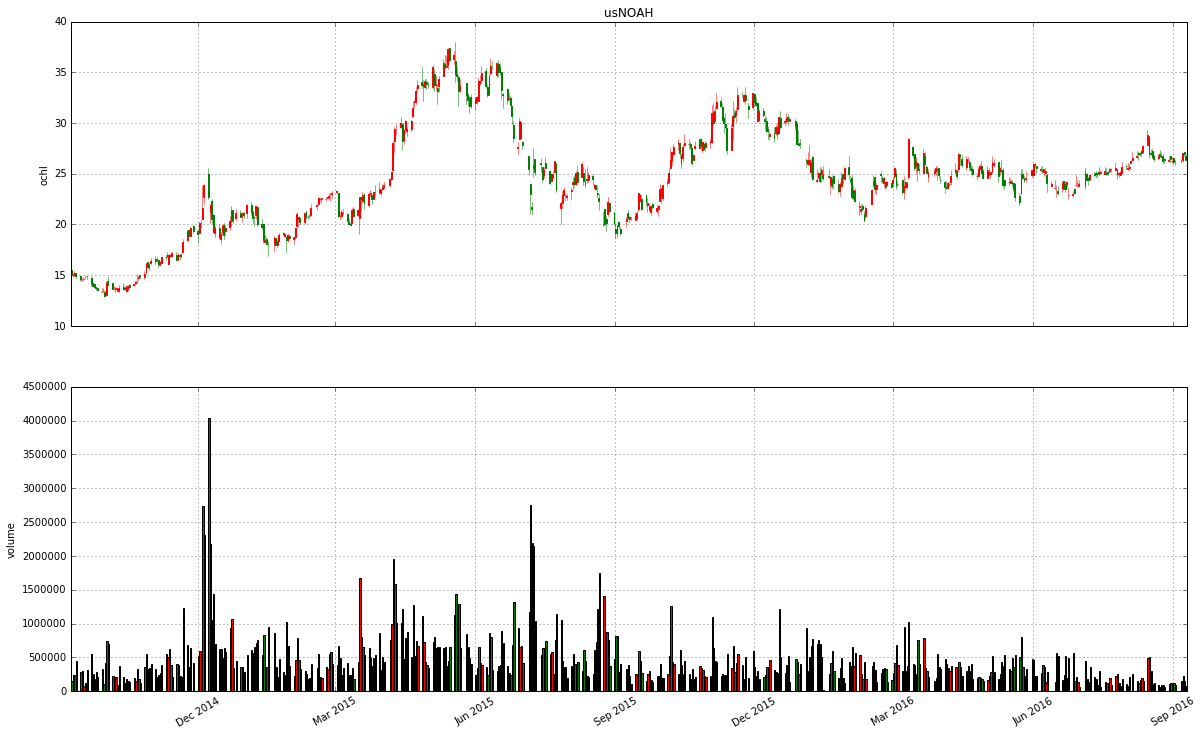

In [7]:
MarketDrawer.plot_candle_form_klpd(kl_pd)

### 动态可交互

In [11]:
MarketDrawer.plot_candle_form_klpd(klpd_5y, html_bk=True)

![image](./Snip20160904_3.png) 

**MarketDrawer 支持从order中绘制，并可加入更多的标记点之后会有操作介绍，支持多个同时显示操作，save参数支持
保存在本地**

In [14]:
filter(lambda x: x.startswith('plot'), dir(MarketDrawer))

['plot_candle_form_klpd',
 'plot_candle_from_order',
 'plot_candle_from_symbol',
 'plot_candle_stick',
 'plot_html_symbol',
 'plot_minute_candle_from_klpd',
 'plot_minute_candle_from_symbol',
 'plot_simple_mul_stock',
 'plot_symbol']

![image](./Snip20160904_4.png)

### 分时图型

原始数据没有high，low， open， close等数据，所有绘制柱状图
使用5m resample 高开低收

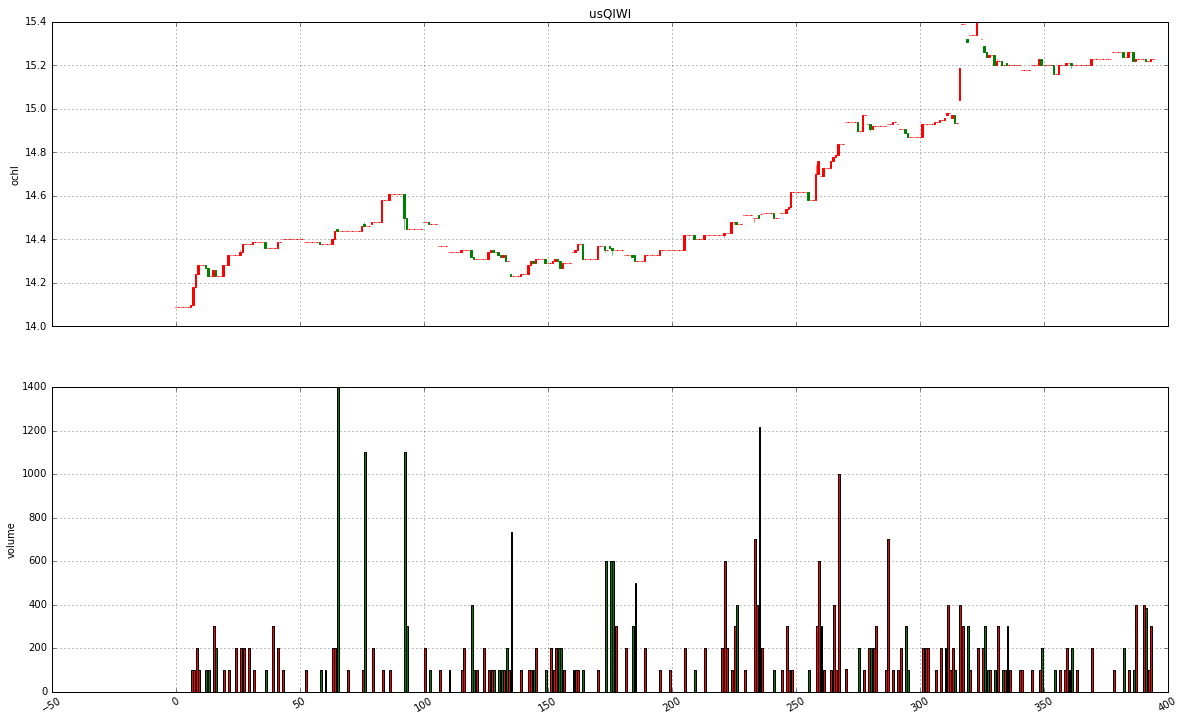

In [20]:
pd_minute = MarketDrawer.plot_minute_candle_from_symbol('usQIWI')

### 获取相同分类的股票列表

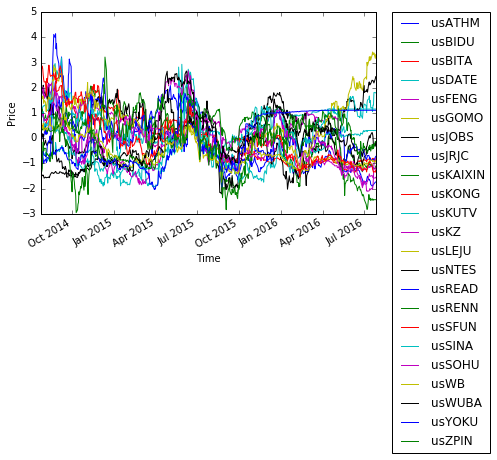

In [23]:
import IndustriesHelper
r_symbol = 'usSFUN'
pDate, pdata_it = IndustriesHelper.get_industries_panel_from_target(r_symbol, show=True)

In [25]:
change_m = pdata_it['netChangeRatio'].dropna(axis=1, how='all')
change_m = change_m.resample('M').mean().T
change_m

,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,...,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31 00:00:00
usATHM,1.802,1.428095,-0.523333,1.049565,-0.979474,-0.734545,-0.0340,0.397368,0.720455,0.753810,...,0.515909,-0.8040,0.672273,-1.775263,0.0170,0.650000,0.294286,-0.821429,-0.962381,0.297059
usBIDU,1.238,-0.028571,0.107143,0.420435,0.154211,-0.315000,-0.2105,-0.338421,0.115455,-0.158095,...,1.479091,0.7825,-0.632273,-0.726842,0.3725,0.450000,0.097143,-0.363810,-0.240476,-0.061765
usBITA,-0.704,2.402381,-0.498571,0.398696,0.618947,-1.159545,-0.6525,0.344211,-0.853182,0.803333,...,0.408182,-0.7630,0.286818,-2.127895,0.6550,0.890000,0.077619,-0.890952,1.760952,0.054118
usDATE,1.298,0.090476,0.660476,-0.759130,-0.566316,-0.020000,-0.2730,0.408947,0.305000,0.759048,...,0.335455,0.2275,0.356364,-0.148947,0.0145,0.117273,0.000476,0.520952,0.940000,0.940000
usFENG,-0.082,0.160000,-0.456667,0.447391,-0.738421,-0.270455,-0.3425,-0.222105,-1.112273,1.190952,...,0.480000,0.0800,0.993636,-1.473158,-0.7970,0.843636,-0.478571,0.013810,-0.395714,0.282941
usJOBS,0.638,-2.751429,-0.678571,0.118261,0.961053,-0.094545,-0.0745,0.070000,-0.410455,0.540476,...,0.977727,-0.2950,-0.329545,-0.264737,0.0235,0.560455,-0.180952,0.203333,-0.320952,0.395882
usJRJC,-0.934,4.904762,-1.108095,-0.689565,1.502105,-1.156818,-0.3010,0.755789,-0.993636,1.079524,...,0.775000,0.1725,2.122273,-0.763684,0.0205,-0.121818,0.523810,-0.833333,0.211429,-0.281176
usKUTV,-0.166,1.202381,-0.802857,-0.044783,-0.264211,-0.543182,0.9065,-0.356316,0.050909,-0.058571,...,0.646818,0.0685,1.391818,-0.880000,0.9205,0.231818,0.737143,-0.077619,0.240952,-0.102353
usKZ,-0.086,-0.080476,-0.934762,-0.368696,0.558947,-0.790000,-0.0435,-0.288421,0.439091,1.087619,...,0.256818,-0.0405,0.413636,-0.263158,0.2090,-0.140000,0.055238,-1.007619,-0.841905,0.888824
usLEJU,-0.608,1.221429,-1.082857,0.463478,-0.153158,-0.828636,-0.1965,-0.328947,-0.699091,1.435714,...,1.236818,-0.9935,-0.084091,-1.817895,-0.4105,1.727727,-0.469048,0.062381,-0.150476,0.514118


### 获取股票代码表

In [35]:
import MarketSymbols
symbols = MarketSymbols.get_market_symbols()
ZLog.info(len(symbols))
# 随机获取n个默认是不放回的
ZLog.info(MarketSymbols.choice_symbols(5))
# 随机获取n个放回的
ZLog.info(MarketSymbols.choice_symbols_with_replace(5))

# 把市场分成训练集合与测试集合的操作
help(MarketSymbols.market_train_test_split)

7995
['usSNE' 'usIDU' 'usUCC' 'usAAOI' 'usHXL']
['usPFSI' 'usTXN' 'usPWB' 'usVMBS' 'usFAN']


Help on function market_train_test_split in module MarketSymbols:

market_train_test_split(n_folds=10, shuffle=True)
    分割市场训练机与测试机
    :param n_folds:
    :param shuffle:
    :return:



### 其它

1. 数据底层源由百度，腾讯自选股，雪球财经，yhoo数据接口，先比较完善的是baidu接入的也是baidu接口，需要更换源可自行切换底层接口
2. 底层数据接口存在源格式不统一问题，需要添加一个层级标准化数据接口与定义
3. 类似代码表等接口同样存在不统一的问题，需要标准化
4. 在多层数据统一的情况下可加入，多源数据校验机制，避免由于一个源的数据出现问题，发出错误的信号导致问题
5. volume数据不可信的问题，验证了volume数据很不可靠，且很难校验准确性，导致策略中不敢使用volume，很严重

## 关于数据缓存

所有数据支持优先使用缓存，强制使用缓存，强制使用网络等模式设置,
    
    ZEnv.set_symbolpd_force(net, local)
    ZENV.g_use_test_cache_data
如果每天定时任务可以使用预加载所有数据，针对因子全市场回测很重要：

    NetStockHelper.net_day_mul_thread_history
    NetStockHelper.net_info_mul_thread